In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Downloads/data_cleaned.csv")

In [3]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
y=df["Survived"]
x=df.drop("Survived",axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x1=sc.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)

In [6]:
from sklearn.model_selection import train_test_split as tts
trainx,testx,trainy,testy=tts(x,y,random_state=53)

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import f1_score 

In [8]:
lr=LR()
lr.fit(trainx,trainy)
tp=lr.predict(trainx)
score=f1_score(tp,trainy)
score

0.7407407407407409

In [9]:
tt=lr.predict(testx)
score1=f1_score(tt,testy)
score1

0.7294117647058824

In [10]:
trp=lr.predict_proba(trainx)
trp

array([[0.81278435, 0.18721565],
       [0.89481526, 0.10518474],
       [0.78591957, 0.21408043],
       ...,
       [0.68046479, 0.31953521],
       [0.46420363, 0.53579637],
       [0.06472064, 0.93527936]])

In [11]:
train_preds=trp[:,1]

In [12]:
for i in range(0,len(train_preds)):
    if train_preds[i]>0.55:
        train_preds[i]=1
    else:
        train_preds[i]=0
        
k=f1_score(train_preds,trainy)
k

0.7354838709677418

In [13]:
train_preds

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
from sklearn.metrics import confusion_matrix 
cf=confusion_matrix(testy,tt)
print(cf)

[[115  21]
 [ 25  62]]


In [15]:
from sklearn.metrics import classification_report as rep
print(rep(testy,tt))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       136
           1       0.75      0.71      0.73        87

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [16]:
lr.coef_

array([[-1.70726915,  0.37079779,  1.00610969,  0.04064224, -1.0466075 ,
         1.26526295, -1.26511852,  0.5919893 ,  0.60260122,  0.60240598,
        -0.78872946, -0.20002171, -0.21908278, -0.58901812,  0.3492764 ,
         0.89664276,  0.18640897,  0.37749881, -0.67575661, -0.81178703,
        -0.32213887,  0.11547777,  0.15161196, -0.2669453 ]])

<BarContainer object of 24 artists>

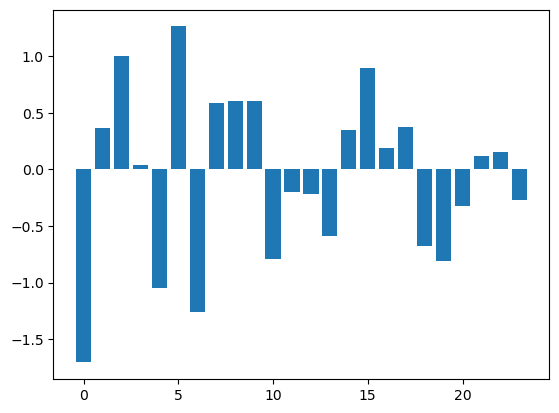

In [17]:
x=range(len(trainx.columns))
c=lr.coef_.reshape(-1)
plt.bar(x,c)

In [18]:
coeff=pd.DataFrame({'Variables': trainx.columns, 'coefficients':abs(c)})

In [19]:
coeff.head()

,Variables,coefficients
0,Age,1.707269
1,Fare,0.370798
2,Pclass_1,1.006110
3,Pclass_2,0.040642
4,Pclass_3,1.046608


In [20]:
sig_var=coeff[abs(coeff.coefficients)>0.3]

In [21]:
subset=df[sig_var['Variables'].values]
subset.head()

,Age,Fare,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_8,Parch_0,Parch_1,Parch_3,Parch_4,Parch_5,Parch_6
0,22.0,7.2500,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,26.0,7.9250,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
3,35.0,53.1000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,35.0,8.0500,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0


In [22]:
trainX,testX,trainY,testY=tts(subset,y,random_state=56)

In [23]:
lr.fit(trainX,trainY)
tp=lr.predict(trainX)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
k=f1_score(tp,trainY)

In [25]:
k

0.748

In [26]:
c=lr.coef_.reshape(-1)
x=range(0,len(trainX.columns))

<BarContainer object of 17 artists>

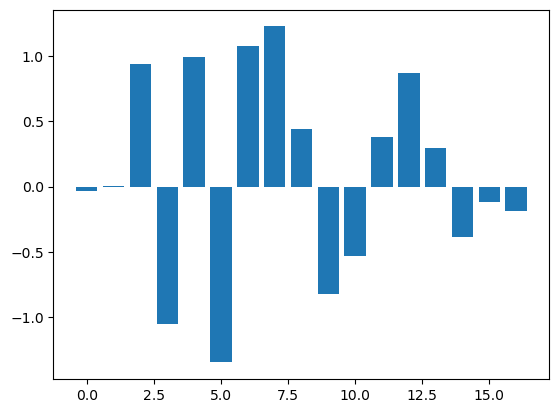

In [27]:
plt.bar(x,c)

In [28]:
import random

In [29]:
x=np.array([i*np.pi/180 for i in range(10,360,3)])

In [30]:
np.random.seed(10)

In [31]:
y=np.sin(x)+np.random.normal(0,0.15,len(x))

In [32]:
df=pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [33]:
df.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


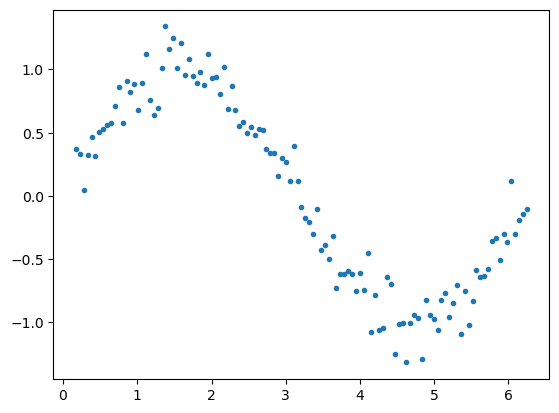

In [34]:
plt.plot(df['x'],df['y'],'.')

In [35]:
for i in range(2,16):
    colname="x_%d"%i
    df[colname]=df['x']**i
df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


In [ ]:
train_x,test_x,train_y,test_y=tts(x,y)